# Trabajo Inferencia

## Introduccion

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
filename = 'my2023-fuel-consumption-ratings.csv'

In [3]:
# Load the data
df = pd.read_csv(filename, encoding='latin1')
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


Se debe crear una variable categórica llamada “país” indicando a qué país pertenece el
fabricante del vehículo.

In [4]:
# List different makes
makes = df['Make'].unique()
print(makes)

['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Genesis'
 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini'
 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'MINI'
 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce' 'Subaru' 'Toyota'
 'Volkswagen' 'Volvo']


In [7]:
# Get the country of origin for each make
car_brands_origin = {
    'Acura': 'Japón',
    'Alfa Romeo': 'Italia',
    'Aston Martin': 'Reino Unido',
    'Audi': 'Alemania',
    'Bentley': 'Reino Unido',
    'BMW': 'Alemania',
    'Bugatti': 'Francia',
    'Buick': 'Estados Unidos',
    'Cadillac': 'Estados Unidos',
    'Chevrolet': 'Estados Unidos',
    'Chrysler': 'Estados Unidos',
    'Dodge': 'Estados Unidos',
    'FIAT': 'Italia',
    'Ford': 'Estados Unidos',
    'Genesis': 'Corea del Sur',
    'GMC': 'Estados Unidos',
    'Honda': 'Japón',
    'Hyundai': 'Corea del Sur',
    'Infiniti': 'Japón',
    'Jaguar': 'Reino Unido',
    'Jeep': 'Estados Unidos',
    'Kia': 'Corea del Sur',
    'Lamborghini': 'Italia',
    'Land Rover': 'Reino Unido',
    'Lexus': 'Japón',
    'Lincoln': 'Estados Unidos',
    'Maserati': 'Italia',
    'Mazda': 'Japón',
    'Mercedes-Benz': 'Alemania',
    'MINI': 'Reino Unido',
    'Mitsubishi': 'Japón',
    'Nissan': 'Japón',
    'Porsche': 'Alemania',
    'Ram': 'Estados Unidos',
    'Rolls-Royce': 'Reino Unido',
    'Subaru': 'Japón',
    'Toyota': 'Japón',
    'Volkswagen': 'Alemania',
    'Volvo': 'Suecia'
}

# Add a new column to the dataframe with the country of origin
df['Country'] = df['Make'].map(car_brands_origin)
df.sample(5)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Country
682,2023,Mitsubishi,Mirage,Compact,1.2,3,AV,X,6.6,5.6,6.2,46,143,7,5,Japón
285,2023,Ford,F-150,Pickup truck: Standard,2.7,6,AS10,X,12.0,9.2,10.7,26,252,5,6,Estados Unidos
594,2023,Mazda,Mazda3 5-Door,Mid-size,2.0,4,AS6,X,8.6,6.7,7.7,37,181,6,7,Japón
126,2023,BMW,Z4 sDrive30i,Two-seater,2.0,4,AS8,Z,9.4,7.1,8.4,34,194,6,7,Alemania
436,2023,Infiniti,QX60 AWD,Sport utility vehicle: Standard,3.5,6,AS9,Z,11.9,9.3,10.7,26,251,5,5,Japón


## Estadística Descriptiva

### Instrucciones
Se procederá a realizar un análisis descriptivo básico de los datos, empleando los estadísticos
más comunes, de dispersión y de centralidad (media, mediana, desviación típica, … ). El análisis
se realizará de modo global y de modo específico según niveles o variables categóricas
escogidas. Además, en esta etapa del estudio se deberá representar visualmente los datos,
usando los distintos tipos de gráficos vistos.

### Procedimiento y requisitos mínimos
La longitud de esta parte del informe (en PDF) debe ser de entre 4 y 6 páginas y deberá contener
como mínimo:
- Estadísticos descriptivos básicos totales: media, mediana, desviación típica, y cuartiles; y
por niveles según la variable categóricas escogida.
- Gráficas que representen e ilustren aspectos significativos del conjunto de datos.
Pueden emplearse: histogramas, gráficos Q- Q y/o gráficos de probabilidad para comparar
muestras, box-plots, diagramas de dispersión ... del conjunto total de los datos y de algunos
subgrupos o niveles concretos de la población.

La discusión y la visualización de los datos obtenidos es donde recaerá la mayor parte del peso
de la evaluación.

In [46]:
@interact
def show_articles_more_than(column='claps', x=5000):
  print(column, x)

interactive(children=(Text(value='claps', description='column'), IntSlider(value=5000, description='x', max=15…

       Model year  Engine size (L)   Cylinders  City (L/100 km)  \
count       833.0       833.000000  833.000000       833.000000   
mean       2023.0         3.147899    5.627851        12.431453   
std           0.0         1.353076    1.968695         3.456191   
min        2023.0         1.200000    3.000000         4.400000   
25%        2023.0         2.000000    4.000000        10.100000   
50%        2023.0         3.000000    6.000000        12.100000   
75%        2023.0         3.600000    6.000000        14.600000   
max        2023.0         8.000000   16.000000        30.300000   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
count          833.000000           833.000000      833.000000   
mean             9.353661            11.047179       27.375750   
std              2.302312             2.878308        7.559968   
min              4.400000             4.400000       11.000000   
25%              7.700000             9.000000       22.000000   


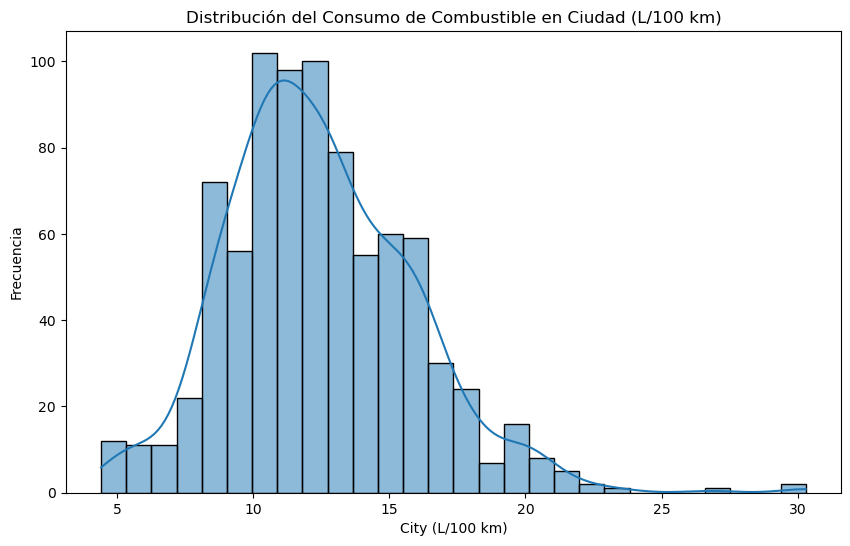

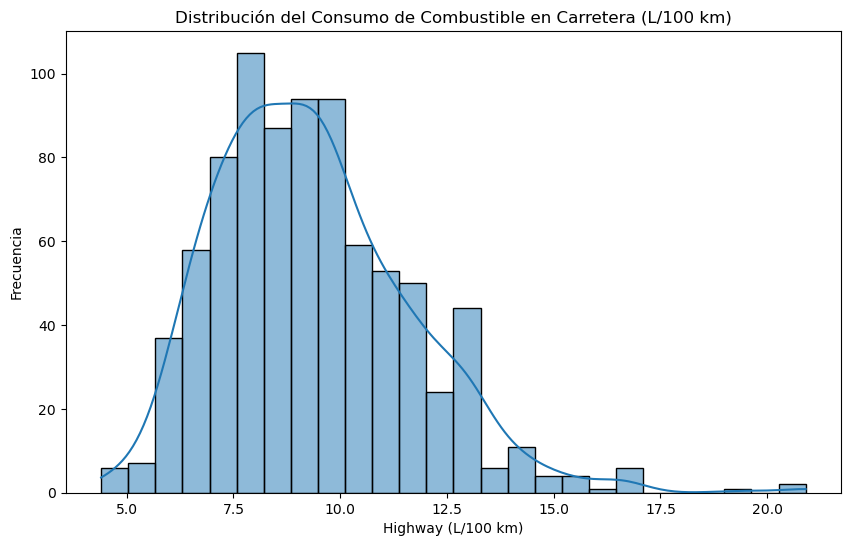

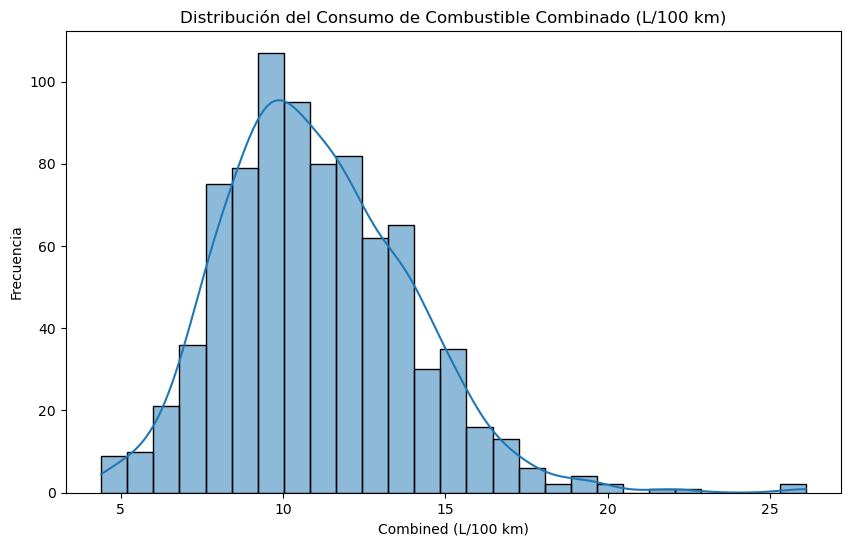

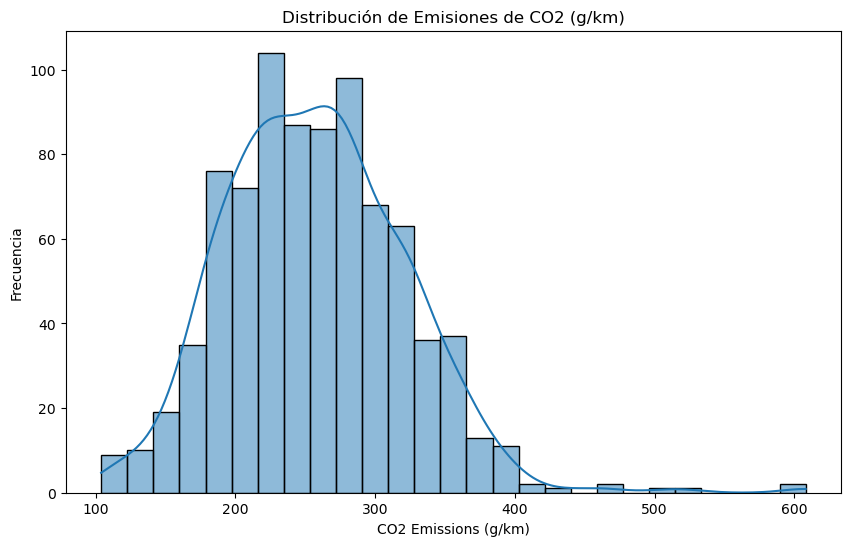

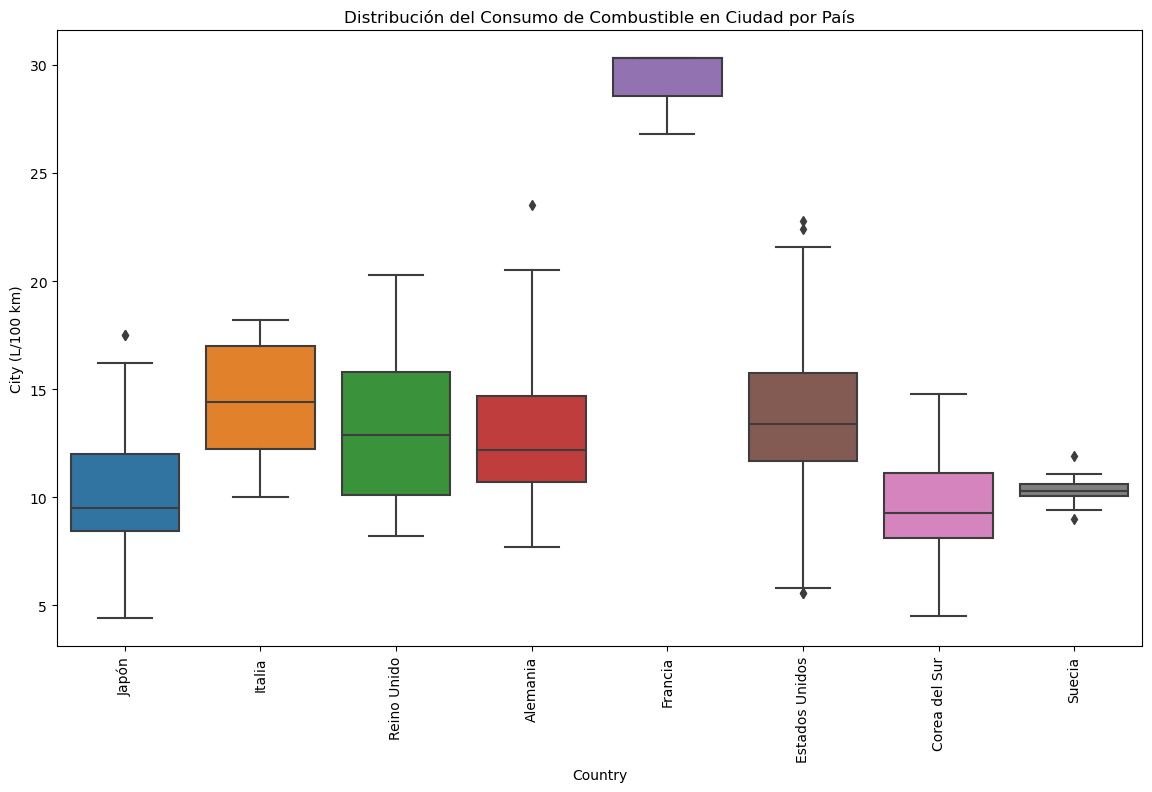

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
# Obtener estadísticas descriptivas
descriptive_stats = df.describe()
print(descriptive_stats)

# Generar un histograma de una columna específica, por ejemplo, 'City (L/100 km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['City (L/100 km)'], kde=True)
plt.title('Distribución del Consumo de Combustible en Ciudad (L/100 km)')
plt.xlabel('City (L/100 km)')
plt.ylabel('Frecuencia')
plt.show()

# Generar un histograma de una columna específica, por ejemplo, 'Highway (L/100 km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Highway (L/100 km)'], kde=True)
plt.title('Distribución del Consumo de Combustible en Carretera (L/100 km)')
plt.xlabel('Highway (L/100 km)')
plt.ylabel('Frecuencia')
plt.show()

# Generar un histograma de una columna específica, por ejemplo, 'Combined (L/100 km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Combined (L/100 km)'], kde=True)
plt.title('Distribución del Consumo de Combustible Combinado (L/100 km)')
plt.xlabel('Combined (L/100 km)')
plt.ylabel('Frecuencia')
plt.show()

# Generar un histograma de una columna específica, por ejemplo, 'CO2 Emissions (g/km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 emissions (g/km)'], kde=True)
plt.title('Distribución de Emisiones de CO2 (g/km)')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frecuencia')
plt.show()


# Generar un boxplot comparando el consumo de combustible en ciudad por país
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='City (L/100 km)')
plt.xticks(rotation=90)
plt.title('Distribución del Consumo de Combustible en Ciudad por País')
plt.xlabel('Country')
plt.ylabel('City (L/100 km)')
plt.show()

## Inferencia Estadística

In [34]:
import warnings
warnings.filterwarnings("ignore")
distributions = {
    "Normal": stats.norm,
    "Exponencial": stats.expon,
    "Gamma": stats.gamma,
    "Beta": stats.beta,
    "Log-Normal": stats.lognorm,
    "Weibull": stats.weibull_min,
    "Chi-Cuadrado": stats.chi2,
    "T-Student": stats.t,
    "F-Snedecor": stats.f,
}

metric_descriptions = {
    "City (L/100 km)": "Consumo de Combustible en Ciudad (L/100 km)",
    "Highway (L/100 km)": "Consumo de Combustible en Carretera (L/100 km)",
    "Combined (L/100 km)": "Consumo de Combustible Combinado (L/100 km)",
    "CO2 emissions (g/km)": "Emisiones de CO2 (g/km)",
}

metric = widgets.Dropdown(
    options=metric_descriptions.keys(),
    description="Métrica:",
    continuous_update=False,
)
distribution_sel = widgets.Dropdown(
    options=distributions.keys(),
    description="Distribución:",
    continuous_update=False,
)
alpha_value = widgets.FloatSlider(
    value=0.05,
    min=0.005,
    max=0.200,
    step=0.005,
    readout_format=".3f",
    description="Nivel de Significancia:",
    continuous_update=False,
)

# Checkboxes
show_differences = widgets.Checkbox(
    value=False,
    description="Mostrar Diferencias",
    disabled=False,
    indent=False,
)
show_expected = widgets.Checkbox(
    value=True,
    description="Mostrar Distribución Ajustada",
    disabled=False,
    indent=False,
)
show_histogram = widgets.Checkbox(
    value=True,
    description="Mostrar Histograma",
    disabled=False,
    indent=False,
)
show_observed = widgets.Checkbox(
    value=True,
    description="Mostrar Histograma de la Muestra",
    disabled=False,
    indent=False,
)



def bondad_ajuste(metric, distribution_str, alpha, show_differences, show_expected, show_histogram, show_observed):

    distribution = distributions[distribution_str]
    # Obtener parámetros de la distribución
    params = distribution.fit(df[metric])

    # Realizar test de bondad de ajuste de chi-cuadrado de Pearson
    observed_freq, bins = np.histogram(df[metric], bins="auto")

    # print('Bins:', bins)
    expected_values = len(df[metric]) * (
        distribution.cdf(bins[1:], *params) - distribution.cdf(bins[:-1], *params)
    )

    # Prueba de bondad de ajuste para City (L/100 km)
    # H0: La muestra sigue una distribución Normal
    # H1: La muestra no sigue una distribución Normal

    # Prueba de bondad de ajuste
    diffs = []
    for i in range(len(observed_freq)):
        if expected_values[i] < 1:
            diffs.append(0)
            continue
        diffs.append(
            ((np.abs(observed_freq[i] - expected_values[i])) ** 2)
            / expected_values[i]
        )
    Z_alpha = stats.chi2.ppf(1 - alpha, len(observed_freq) - 1 - len(params))

    T_est = np.sum(diffs)

    p = 1 - stats.chi2.cdf(T_est, len(observed_freq) - 1 - len(params))

    print(
        f"Resultados del Test de Bondad de Ajuste para la Distribución {distribution_str}:"
    )
    print("Parámetros estimados de la Distribución", distribution_str, ":", *params)
    # sum of observed frequencies
    print("Suma de Frecuencias Observadas:", np.sum(observed_freq))
    print()
    print("Estadístico de Prueba:", round(T_est, 4))
    print("Valor Crítico:", round(Z_alpha, 4))

    print()
    print(f"Valor P: {round(p, 4)}")
    print(f"Nivel de Significancia: {round(alpha,2)} ({(round(1-alpha,2))*100}% de confianza)")

    print()
    # Interpretación
    if T_est < Z_alpha:
        print(
            f"La muestra parece seguir una distribución {distribution_str} (no se rechaza H0)"
        )
    else:
        print(
            f"La muestra no parece seguir una distribución {distribution_str} (se rechaza H0)"
        )

    # Plot the distribution and the histogram
    plt.figure(figsize=(10, 6))
    # Plot the histogram calculated above (observed_freq, bins)
    if show_histogram:
        plt.hist(
            df[metric], bins=bins, color="b", alpha=0.5, label="Histograma de la Muestra"
        )

    # Curva del histograma de la muestra ajustada
    if show_observed:
        plt.plot(
            bins[:-1] + 0.5 * (bins[1] - bins[0]),
            observed_freq,
            "k--",
            linewidth=2,
            label="Curva del Histograma de la Muestra",
        )

    # Plot the diffs
    if show_differences:
        plt.bar(
            bins[:-1] + 0.5 * (bins[1] - bins[0]),
            diffs,
            color="green",
            alpha=0.5,
            label="Diferencias",
            # Bottom is the minimum value of the observed_freq and expected_values on each bin
            bottom=np.minimum(observed_freq, expected_values),
        )
        plt.fill_between(
            bins[:-1] + 0.5 * (bins[1] - bins[0]),
            observed_freq,
            expected_values,
            color="gray",
            alpha=0.5,
            label="Diferencias",
        )

    # Curva del histograma de la muestra ajustada
    if show_expected:
        plt.plot(
            bins[:-1] + 0.5 * (bins[1] - bins[0]),
            expected_values,
            "r--",
            linewidth=2,
            label="Distribución Ajustada",
        )

    plt.title(
        f"Distribución de {metric_descriptions[metric]} y Ajuste de la Distribución {distribution_str}"
    )

    # vertical dashed line on each bin
    plt.grid(True, axis="x", linestyle="--")

    plt.xticks(bins.round(2), rotation=45)
    plt.xlabel(metric)
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()
    return


_ = interact(
    bondad_ajuste, metric=metric, distribution_str=distribution_sel, alpha=alpha_value, show_differences=show_differences, show_expected=show_expected, show_histogram=show_histogram, show_observed=show_observed
)

interactive(children=(Dropdown(description='Métrica:', options=('City (L/100 km)', 'Highway (L/100 km)', 'Comb…

Parámetros de la Distribución norm : (12.43145258103241, 3.4541163122645133)
Suma de Frecuencias Observadas: 833
Resultados del Test de Bondad de Ajuste para la Distribución norm:
Estadístico de Prueba: 57.1818
Valor Crítico: 37.6525
Valor P: 0.0006
La muestra no parece seguir una distribución norm (se rechaza H0)
---


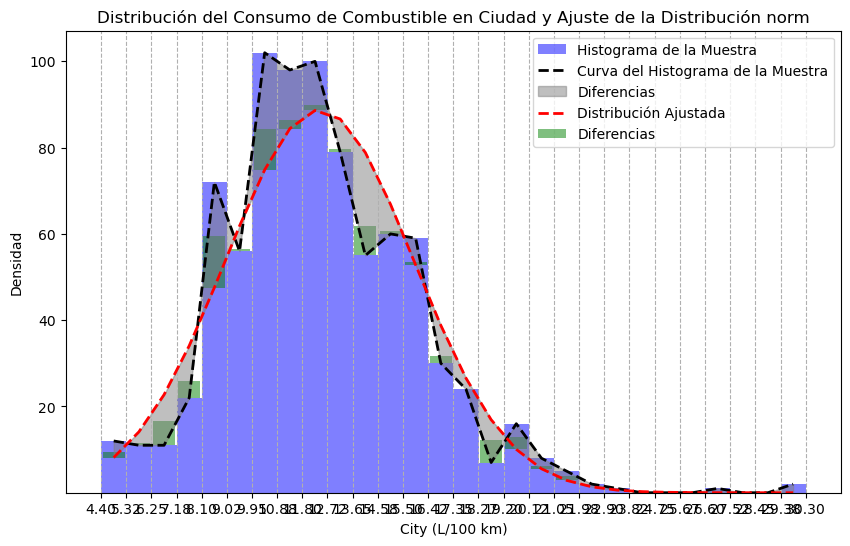

Parámetros de la Distribución expon : (4.4, 8.03145258103241)
Suma de Frecuencias Observadas: 833
Resultados del Test de Bondad de Ajuste para la Distribución expon:
Estadístico de Prueba: 692.2301
Valor Crítico: 37.6525
Valor P: 0.0
La muestra no parece seguir una distribución expon (se rechaza H0)
---


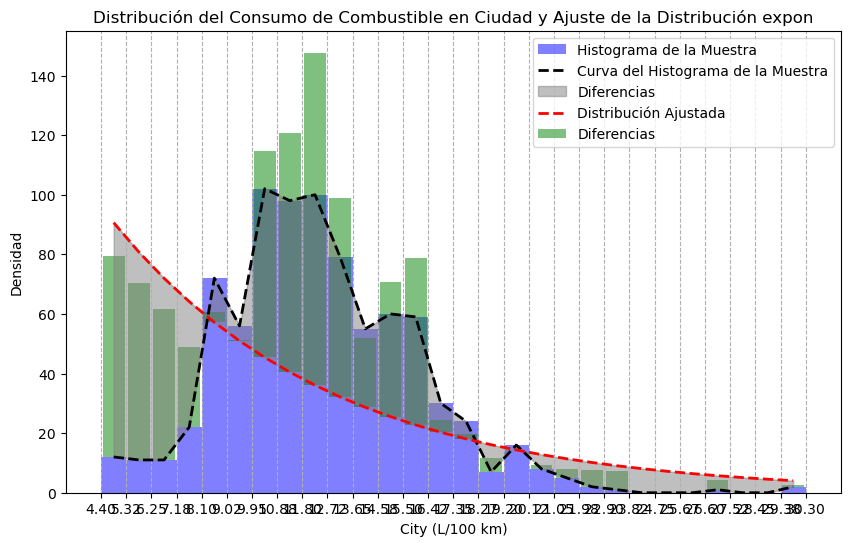

Parámetros de la Distribución gamma : (17.95066316977791, -2.09445973431024, 0.8092131220902294)
Suma de Frecuencias Observadas: 833
Resultados del Test de Bondad de Ajuste para la Distribución gamma:
Estadístico de Prueba: 51.7969
Valor Crítico: 36.415
Valor P: 0.0028
La muestra no parece seguir una distribución gamma (se rechaza H0)
---


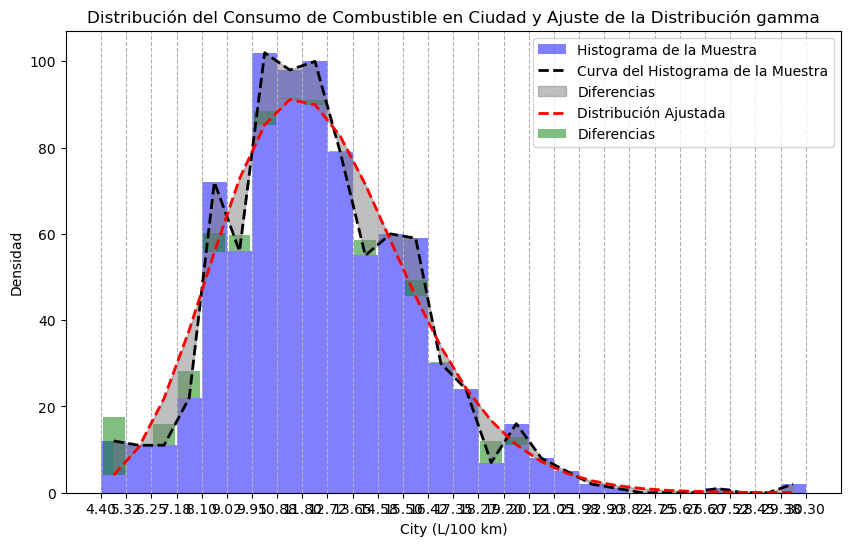

Parámetros de la Distribución lognorm : (0.16791924654631574, -7.863502704698599, 20.010114835610104)
Suma de Frecuencias Observadas: 833
Resultados del Test de Bondad de Ajuste para la Distribución lognorm:
Estadístico de Prueba: 51.8192
Valor Crítico: 36.415
Valor P: 0.0028
La muestra no parece seguir una distribución lognorm (se rechaza H0)
---


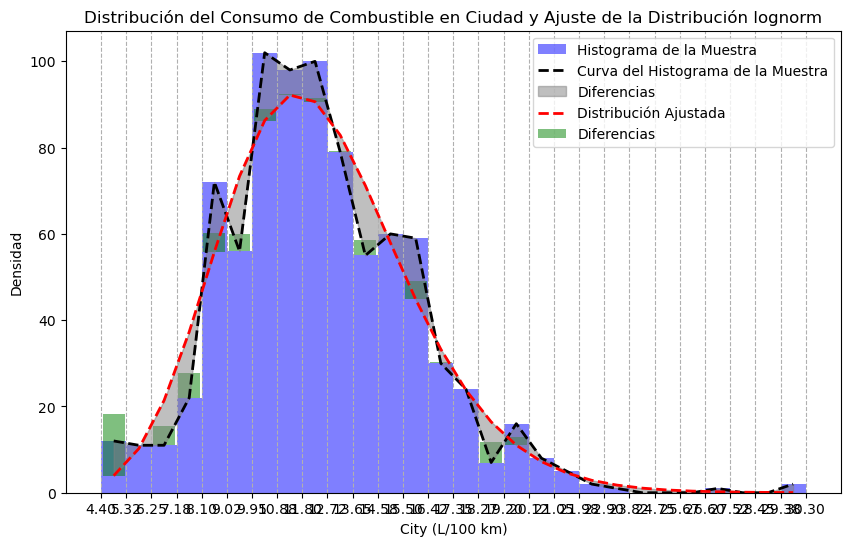

In [19]:
# Intervalo de confianza para la media
mean = df['City (L/100 km)'].mean()
sem = stats.sem(df['City (L/100 km)'])
confidence = 0.95
h = sem * stats.t.ppf((1 + confidence) / 2, len(df['City (L/100 km)']) - 1)
interval_mean = (mean - h, mean + h)
print('Intervalo de confianza para la media: %.3f, %.3f' % interval_mean)

# Intervalo de confianza para la varianza
variance = df['City (L/100 km)'].var()
dfn = len(df['City (L/100 km)']) - 1
chi2_lower = stats.chi2.ppf((1 - confidence) / 2, dfn)
chi2_upper = stats.chi2.ppf(1 - (1 - confidence) / 2, dfn)
interval_variance = (dfn * variance / chi2_upper, dfn * variance / chi2_lower)
print('Intervalo de confianza para la varianza: %.3f, %.3f' % interval_variance)

Intervalo de confianza para la media: 12.196, 12.667
Intervalo de confianza para la varianza: 10.876, 13.182


In [23]:
# Filtrar los datos por país
japan_cars = df[df['Country'] == 'Japón']['City (L/100 km)']
us_cars = df[df['Country'] == 'Estados Unidos']['City (L/100 km)']

# Prueba t de Student para muestras independientes
t_stat, p_val = stats.ttest_ind(japan_cars, us_cars)
print('t=%.3f, p=%.3f' % (t_stat, p_val))

# Interpretación
alpha = 0.05
if p_val > alpha:
    print('No hay diferencia significativa en el consumo de combustible entre Japón y Estados Unidos (no se rechaza H0)')
else:
    print('Hay una diferencia significativa en el consumo de combustible entre Japón y Estados Unidos (se rechaza H0)')

t=-1.013, p=0.312
No hay diferencia significativa en el consumo de combustible entre Japón y Estados Unidos (no se rechaza H0)


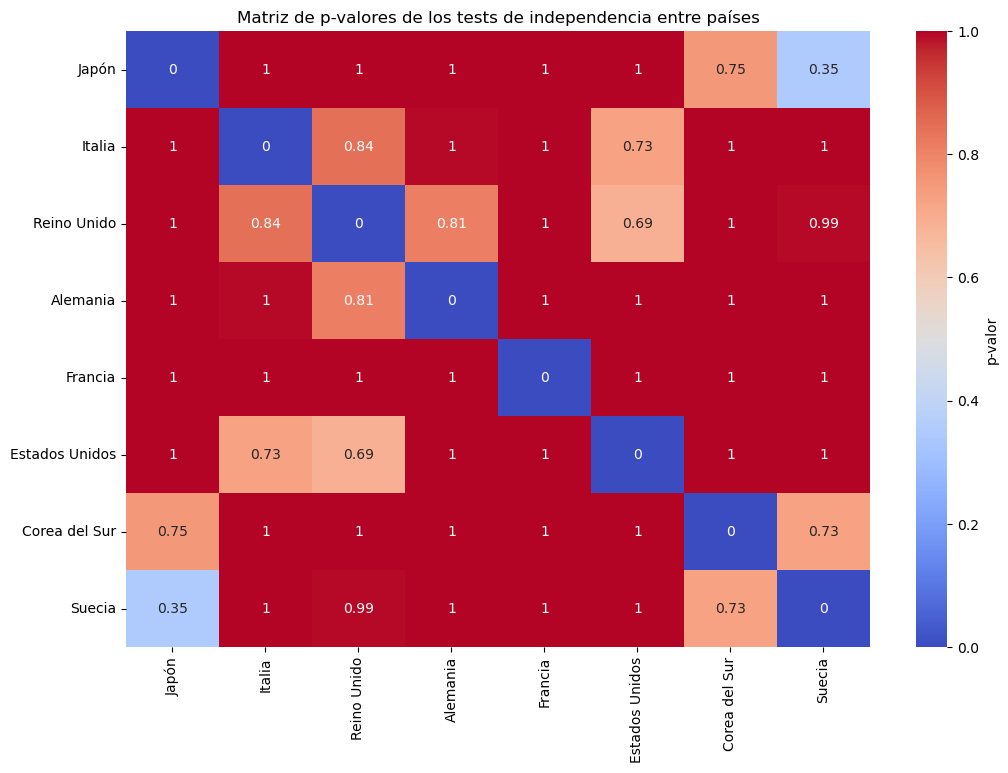

In [33]:
import pandas as pd
import scipy.stats as stats

# Crear una lista de países únicos en el DataFrame
paises = df['Country'].unique()

# Crear un DataFrame para almacenar los p-valores de los tests de independencia
correlation_matrix = pd.DataFrame(index=paises, columns=paises)

# Realizar el test de independencia (chi-cuadrado) para cada par de países
for pais1 in paises:
    for pais2 in paises:
        if pais1 != pais2:
            # Filtrar los datos para los dos países
            data1 = df[df['Country'] == pais1]['City (L/100 km)']
            data2 = df[df['Country'] == pais2]['City (L/100 km)']

            # Crear una tabla de contingencia solo si ambos conjuntos de datos tienen datos
            if not data1.empty and not data2.empty:
              t_stat, p_val = stats.ttest_ind(data1, data2)
              correlation_matrix.at[pais1, pais2] = 1-round(p_val, 4)
            else:
                correlation_matrix.at[pais1, pais2] = None
        else:
            # Los tests de independencia de un país consigo mismo no son necesarios
            correlation_matrix.at[pais1, pais2] = 0.0

# Convertir a float, ignorando valores None
correlation_matrix = correlation_matrix.astype(float, errors='ignore')

# Mostrar la matriz de correlación con sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-valor'})
plt.title('Matriz de p-valores de los tests de independencia entre países')
plt.show()
